In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To Make ‘PassengerId’ as the index column

In [5]:
data=pd.read_csv(r"C:/Users/Ashif/Downloads/titanic_dataset.csv",index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# To check the basic details of the dataset

In [6]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Missing values in the dataset

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# To fill missing values in column 'Age'

In [9]:
for i in ['Age']:
    data[i]=data[i].fillna(data[i].median())

# To drop cabin column with more missing values

In [10]:
data=data.drop('Cabin',axis=1)

# To fill missing values in Embarked column

In [11]:
for i in ['Embarked']:
    data[i]=data[i].fillna(data[i].mode()[0])

# To check and handle outliers in at least 3 columns in the dataset

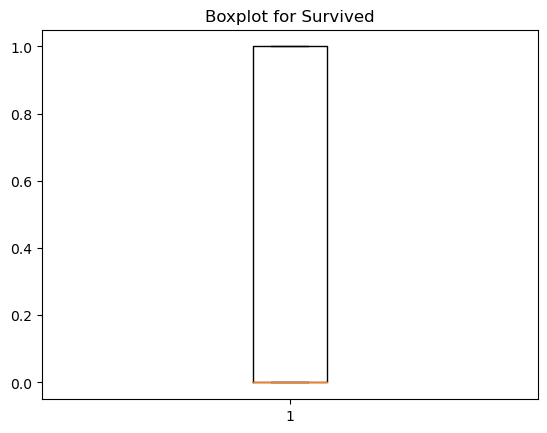

In [13]:
## Boxplot of column Survived
plt.boxplot(data['Survived'])
plt.title('Boxplot for Survived')
plt.show()

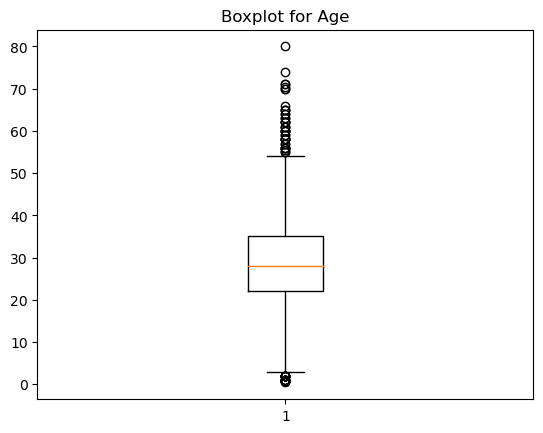

In [14]:
## Boxplot of column Age
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')
plt.show()

# To find the IQR value and limits to handle outliers

In [17]:
Q1=np.percentile(data['Age'],25)
Q3=np.percentile(data['Age'],75)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

# To find the outliers

In [16]:
outlier=[]
for x in data['Age']:
    if x >upr_limit or x<low_limit:
        outlier.append(x)

# To find the index of above upper limit

In [18]:
ind=data['Age']>upr_limit
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

# To drop the outliers

In [19]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

# To find the index of below lower limit

In [20]:
ind=data['Age']<low_limit
data.loc[ind].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

# To drop the outliers

In [21]:
data.drop([8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)